# Synthetic Image Identification Using Deep Learning

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler 
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19,EfficientNetB0,ResNet50
import numpy as np

In [3]:
# Load image dataset
data = tf.keras.utils.image_dataset_from_directory(r"D:\## BE Sem II\Project stage II\Cifake Dataset\TRAIN", image_size=(32, 32))

Found 11149 files belonging to 2 classes.


0.0
255.0


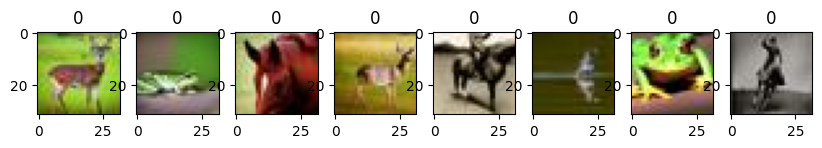

In [4]:
# Visualize a batch of images
data_it = data.as_numpy_iterator()
batch = data_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

print(batch[0].min())
print(batch[0].max())

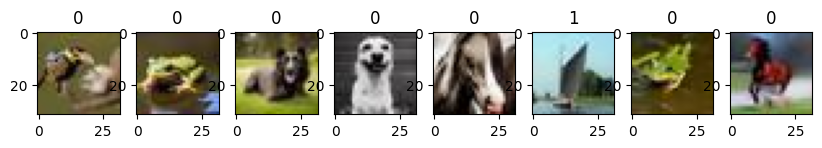

In [5]:
# Scale pixel values to the range [0, 1]
data = data.map(lambda x, y : (x/255, y))

# Visualize a scaled batch of images
scaled_it = data.as_numpy_iterator()
batch = scaled_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])


In [6]:
# Split the dataset
train_size = int(len(data) * 0.7)
cv_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size + cv_size).take(test_size)

print(len(train) + len(cv) + len(test))


348


# CNN

In [8]:
# Define the CNN model with enhancements
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# Learning rate scheduler
initial_learning_rate = 0.001
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Adjust the decay factor as needed
lr_schedule = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=initial_learning_rate)

In [10]:
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(data, validation_data=cv, epochs=10, callbacks=[lr_schedule])


Epoch 1/10
349/349 [==============================] - 34s 98ms/step - loss: 0.3134 - accuracy: 0.8689 - val_loss: 0.3421 - val_accuracy: 0.8528 - lr: 9.0250e-04
Epoch 2/10
349/349 [==============================] - 36s 103ms/step - loss: 0.2605 - accuracy: 0.8951 - val_loss: 0.4916 - val_accuracy: 0.7867 - lr: 8.5737e-04
Epoch 3/10
349/349 [==============================] - 29s 84ms/step - loss: 0.2197 - accuracy: 0.9132 - val_loss: 0.2554 - val_accuracy: 0.8868 - lr: 8.1451e-04
Epoch 4/10
349/349 [==============================] - 29s 83ms/step - loss: 0.2020 - accuracy: 0.9204 - val_loss: 0.1343 - val_accuracy: 0.9524 - lr: 7.7378e-04
Epoch 5/10
349/349 [==============================] - 29s 82ms/step - loss: 0.1705 - accuracy: 0.9338 - val_loss: 0.1172 - val_accuracy: 0.9574 - lr: 7.3509e-04
Epoch 6/10
349/349 [==============================] - 29s 83ms/step - loss: 0.1422 - accuracy: 0.9439 - val_loss: 0.1388 - val_accuracy: 0.9470 - lr: 6.9834e-04
Epoch 7/10
349/349 [=============

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

35/35 [==============================] - 6s 29ms/step - loss: 0.0568 - accuracy: 0.9786
Test Accuracy: 97.86%


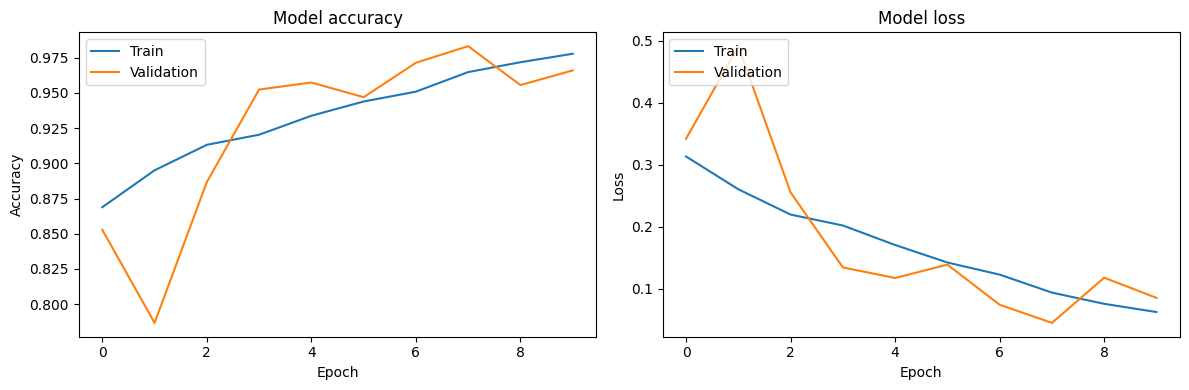

In [14]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [15]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    

1/1 [==============================] - 0s 70ms/step


In [16]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')

Precision: 0.9956331849098206, Recall: 0.9681528806686401


In [17]:
from tensorflow.keras.models import load_model
from keras.models import load_model
from tensorflow import keras

In [19]:
model.save("AIGeneratedModelcnn.h5")

In [20]:
model_new = keras.models.load_model("AIGeneratedModelcnn.h5")

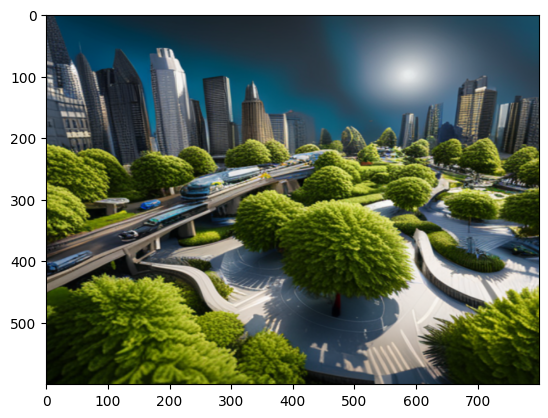

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\vaibh\Downloads\data\ai3.png"
try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [22]:
import numpy as np

In [23]:
resize = tf.image.resize(img, (32, 32))

y_pred = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 321ms/step


In [24]:
y_pred

array([[0.40145215]], dtype=float32)

In [25]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: SYNTHETIC


# VGG19

In [26]:
# Define a VGG19 model for image classification
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.trainable = False  

In [27]:
# Create a new model by adding a few layers on top of the VGG19 model
vgg_based_model = models.Sequential()
vgg_based_model.add(vgg_model)
vgg_based_model.add(layers.Flatten())
vgg_based_model.add(layers.Dense(256, activation='relu'))
vgg_based_model.add(layers.BatchNormalization())
vgg_based_model.add(layers.Dropout(0.5))
vgg_based_model.add(layers.Dense(128, activation='relu'))
vgg_based_model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
# Learning rate scheduler for the VGG19-based model
vgg_initial_learning_rate = 0.001
vgg_lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * 0.95)
vgg_optimizer = Adam(learning_rate=vgg_initial_learning_rate)


In [29]:
# Compile the VGG19-based model
vgg_based_model.compile(optimizer=vgg_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the VGG19-based model
vgg_history = vgg_based_model.fit(data, validation_data=cv, epochs=10, callbacks=[vgg_lr_schedule])


Epoch 1/10
349/349 [==============================] - 100s 279ms/step - loss: 0.4799 - accuracy: 0.7781 - val_loss: 0.3527 - val_accuracy: 0.8564 - lr: 9.5000e-04
Epoch 2/10
349/349 [==============================] - 91s 261ms/step - loss: 0.4180 - accuracy: 0.8105 - val_loss: 0.3199 - val_accuracy: 0.8678 - lr: 9.0250e-04
Epoch 3/10
349/349 [==============================] - 58s 165ms/step - loss: 0.3889 - accuracy: 0.8226 - val_loss: 0.3037 - val_accuracy: 0.8777 - lr: 8.5737e-04
Epoch 4/10
349/349 [==============================] - 61s 175ms/step - loss: 0.3747 - accuracy: 0.8322 - val_loss: 0.2951 - val_accuracy: 0.8809 - lr: 8.1451e-04
Epoch 5/10
349/349 [==============================] - 63s 180ms/step - loss: 0.3593 - accuracy: 0.8414 - val_loss: 0.2821 - val_accuracy: 0.8918 - lr: 7.7378e-04
Epoch 6/10
349/349 [==============================] - 60s 173ms/step - loss: 0.3556 - accuracy: 0.8418 - val_loss: 0.2575 - val_accuracy: 0.8986 - lr: 7.3509e-04
Epoch 7/10
349/349 [=======

In [31]:
# Evaluate the VGG19-based model on the test set
vgg_test_loss, vgg_test_accuracy = vgg_based_model.evaluate(test)
print(f'VGG19 Test Accuracy: {vgg_test_accuracy * 100:.2f}%')


35/35 [==============================] - 13s 215ms/step - loss: 0.2576 - accuracy: 0.8964
VGG19 Test Accuracy: 89.64%


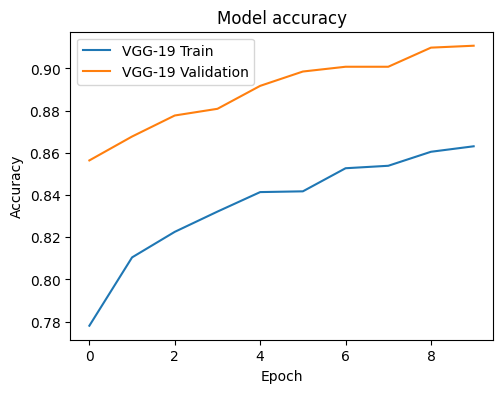

In [32]:
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG-19 Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

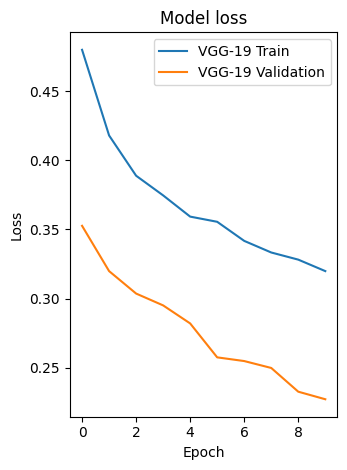

In [33]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_loss'], label='VGG-19 Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = vgg_based_model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)

1/1 [==============================] - 0s 277ms/step


In [35]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')


Precision: 0.8720173239707947, Recall: 0.8777292370796204


In [36]:
vgg_based_model.save("AIGeneratedModelvgg.h5")

In [37]:
vgg_based_model_new = keras.models.load_model("AIGeneratedModelvgg.h5")

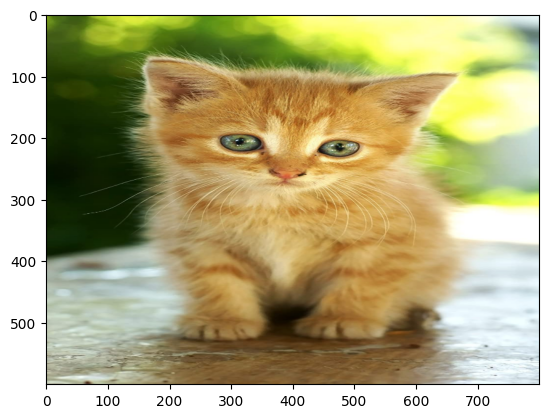

In [38]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\vaibh\Downloads\data\real2.jpeg"

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [39]:
import numpy as np

In [40]:
resize = tf.image.resize(img, (32, 32))

y_pred = vgg_based_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 528ms/step


In [41]:
y_pred

array([[0.85279125]], dtype=float32)

In [42]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: REAL
